<a href="https://colab.research.google.com/github/dayaYanez/MLTSA25_DYanez/blob/main/class4_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

consuption_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv')
consuption_df



,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525
...,...,...,...,...,...,...
181,2015.25,0.742163,0.651337,-0.464605,-28.634280,-12.920307
182,2015.50,0.808291,0.607343,0.128754,-29.523084,-12.973597
183,2015.75,0.697304,0.508611,-0.628269,-28.408732,-12.956514
184,2016.00,0.479744,0.427022,-0.382036,-28.118906,-13.123471


Slope: -0.00788647792174552
Intercept: 16.431879334502522


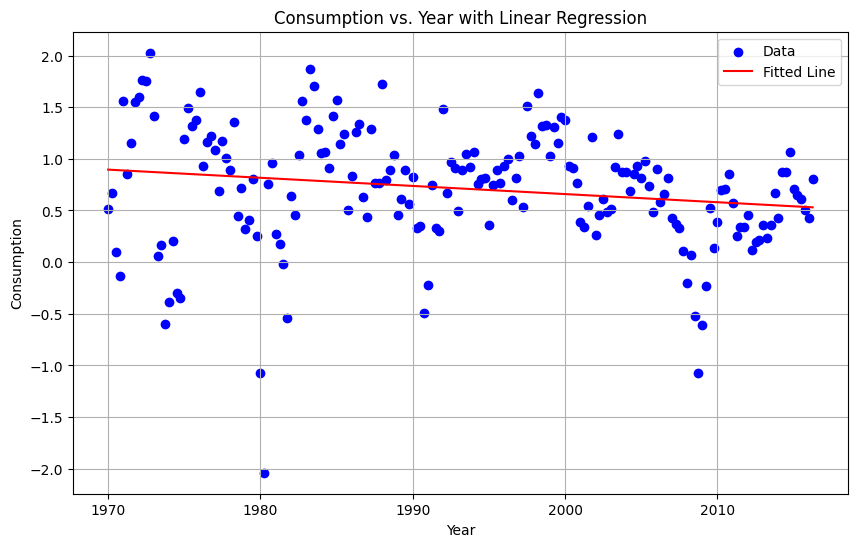

In [ ]:
# prompt: using the data frame  consuption_df fit the line to sonsuption vs time with sklearn include fitting the intercept and plot

from sklearn.linear_model import LinearRegression

# Assuming consuption_df is already loaded as in the previous code

# Prepare the data
X = consuption_df['year'].values.reshape(-1, 1)  # Reshape for sklearn
y = consuption_df['consumption'].values

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the model parameters
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', color='blue')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Fitted Line')

plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs. Year with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


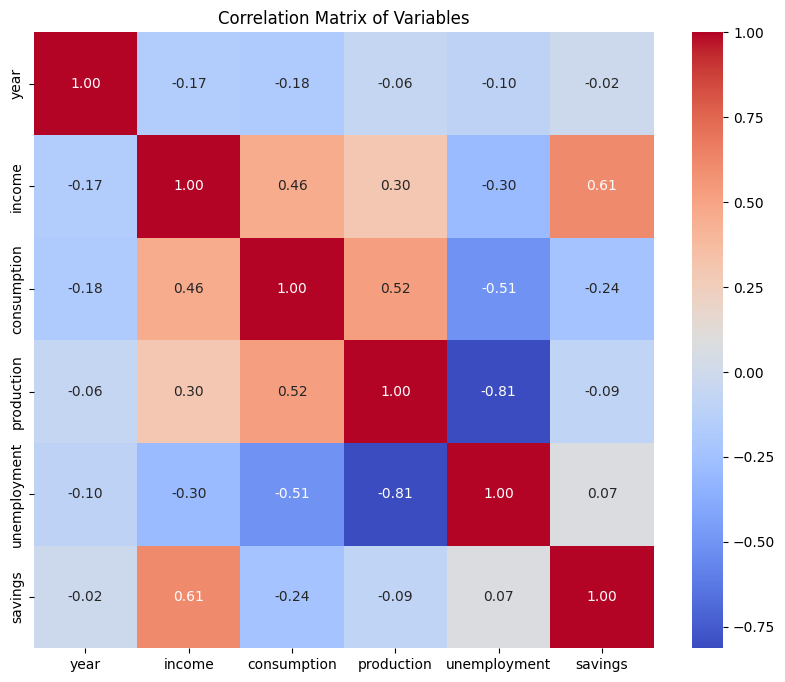

In [ ]:
# prompt: show the correlation of all variables with one another  and plot

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = consuption_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


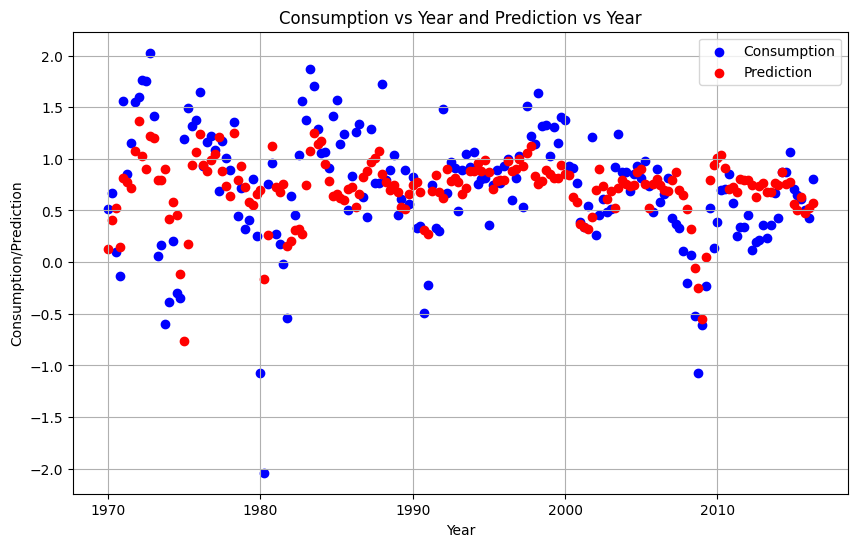

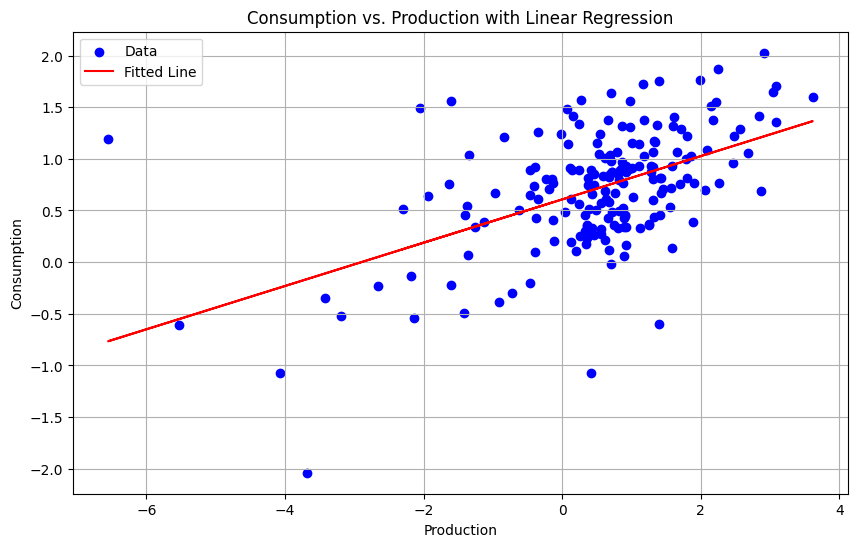

In [ ]:
# prompt: using the data frame  consuption_df fit the line to constuption vs production with sklearn include fitting the intercept and plot the result, plot year vs consuption and year vs prediction on the same plot

# Assuming consuption_df is already loaded as in the previous code

# Prepare the data
X = consuption_df['production'].values.reshape(-1, 1)  # Use 'production' as the predictor
y = consuption_df['consumption'].values

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(consuption_df['year'], consuption_df['consumption'], label='Consumption', color='blue')
plt.scatter(consuption_df['year'], y_pred, label='Prediction', color='red')

plt.xlabel('Year')
plt.ylabel('Consumption/Prediction')
plt.title('Consumption vs Year and Prediction vs Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot consumption vs production with the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Production')
plt.ylabel('Consumption')
plt.title('Consumption vs. Production with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
consuption_df.columns

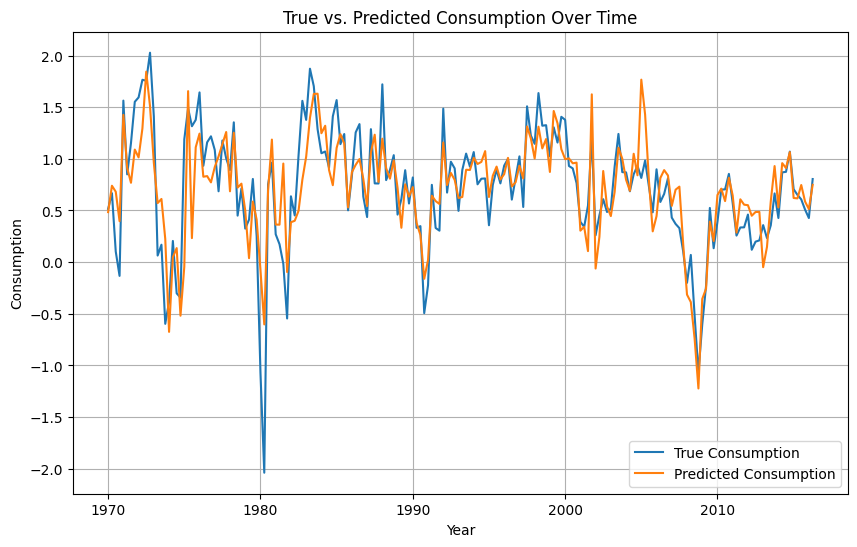

Sum of Squared Errors (SSE): 20.05170301300749


In [ ]:
# prompt: fit a multilinear model with skilearn to consuption_df predicting consuption and plot the true value of consuption and the prediction over time, also show the sum of squARED ERROR, use all the from consuption_df to do the prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming consuption_df is already loaded as in the previous code

# Prepare the data.  Use all columns except 'year' and 'consumption' as predictors
X = consuption_df.drop(columns=['year', 'consumption'])
y = consuption_df['consumption']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Sum of Squared Errors (SSE)
sse = mean_squared_error(y, y_pred) * len(y)

# Plot the true and predicted values over time
plt.figure(figsize=(10, 6))
plt.plot(consuption_df['year'], y, label='True Consumption')
plt.plot(consuption_df['year'], y_pred, label='Predicted Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('True vs. Predicted Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

print(f"Sum of Squared Errors (SSE): {sse}")
